In [ ]:
#data source: https://publicpay.ca.gov/Reports/RawExport.aspx

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
%matplotlib inline


In [115]:
pops = pd.DataFrame({'county':['Mendocino','Humboldt','Glenn','Tehama','Trinity','Lake','Sonoma'],'population':[86749,135558,28393,65084,12285,64386,494336]})
pops

,county,population
0,Mendocino,86749
1,Humboldt,135558
2,Glenn,28393
3,Tehama,65084
4,Trinity,12285
5,Lake,64386
6,Sonoma,494336


In [23]:
# county_df = pd.read_csv('county_data.csv')
df_list = []
for f in glob.glob('/home/stedn/Downloads/*County.csv'):
    df_list.append(pd.read_csv(f,engine='python'))
full_df = pd.concat(df_list)
full_df.to_csv('county_data_full.csv')

In [25]:
full_df['EmployerCounty'].value_counts()

Los Angeles        749244
Riverside          159077
San Bernardino     158023
Santa Clara        145624
San Diego          141356
Orange             131259
Sacramento          96218
Contra Costa        82662
Alameda             72494
Ventura             67850
Kern                66909
San Mateo           58811
Fresno              55790
San Joaquin         54419
Tulare              48946
Monterey            39056
Sonoma              37151
Santa Barbara       36161
Stanislaus          31669
San Luis Obispo     23282
Butte               22796
Placer              20900
Marin               20795
Solano              20286
Santa Cruz          18957
Merced              17943
Shasta              15243
El Dorado           15210
Humboldt            14286
Imperial            14169
Yolo                13121
Napa                11970
Madera              11307
Kings               11080
Mendocino            8397
Lake                 8109
Sutter               7994
Nevada               6976
Yuba        

In [26]:
county_df = full_df.loc[full_df['EmployerCounty'].isin(['Mendocino','Humboldt','Trinity','Tehama','Glenn','Lake','Sonoma'])]

In [35]:
county_df['TotalPayPlusBenefits']=county_df['TotalWages']+county_df['TotalRetirementAndHealthContribution']

/home/stedn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


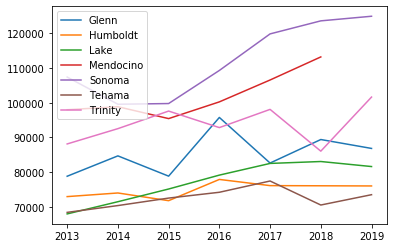

In [39]:
fig,ax = plt.subplots()
tst = county_df.loc[county_df['Position'].str.contains('Correction') | county_df['Position'].str.contains('Sheriff') | county_df['Position'].str.contains('Probat')].groupby(['EmployerCounty','Year'])['TotalPayPlusBenefits'].mean().reset_index()   
for a in tst['EmployerCounty'].unique(): 
    sub = tst.loc[tst['EmployerCounty']==a]
    plt.plot(sub['Year'],sub['TotalPayPlusBenefits'],label=a)
plt.legend(loc='upper left')

In [125]:
county_df.loc[(county_df['EmployerCounty']=='Lake') & (county_df['Position'].str.contains('Correction') | county_df['Position'].str.contains('Sheriff') | county_df['Position'].str.contains('Probat')),'DepartmentOrSubdivision'].value_counts()

Jail Facilities               450
Sheriff-Coroner               338
Probation Officer-Juvenile    115
Probation Officer-Juvenil      99
Sheriff-Bailiffs               18
Juvenile Home                  17
Marine Patrol                   7
Name: DepartmentOrSubdivision, dtype: int64

In [62]:
county_df.loc[(county_df['EmployerCounty']=='Mendocino') & ((county_df['DepartmentOrSubdivision']=='Sheriff Coroner') | (county_df['DepartmentOrSubdivision']=='Jail') | (county_df['DepartmentOrSubdivision']=='Probation Office') | (county_df['DepartmentOrSubdivision']=='Juvenile Hall') | (county_df['DepartmentOrSubdivision']=='Sheriff - Cops Program Ab3229')),'DepartmentOrSubdivision']

Sheriff Coroner                  778
Jail                             448
Probation Office                 290
Juvenile Hall                    239
Sheriff - Cops Program Ab3229      9
Name: DepartmentOrSubdivision, dtype: int64

Text(0, 0.5, 'Median Wage+Benefits')

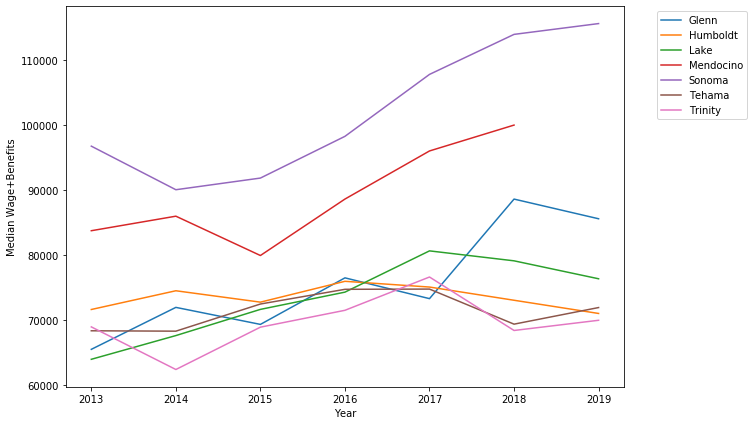

In [132]:
fig,ax = plt.subplots(figsize=(10,7))
subind = county_df['Position'].str.contains('Correction') | county_df['Position'].str.contains('Sheriff') | county_df['Position'].str.contains('Probat') | county_df['DepartmentOrSubdivision'].str.contains('Probat') | county_df['DepartmentOrSubdivision'].str.contains('Sheriff') | county_df['DepartmentOrSubdivision'].str.contains('Jail') | county_df['DepartmentOrSubdivision'].str.contains('Juven')
tst = county_df.loc[subind].groupby(['EmployerCounty','Year'])['TotalPayPlusBenefits'].median().reset_index()   
for a in tst['EmployerCounty'].unique(): 
    sub = tst.loc[tst['EmployerCounty']==a]
    plt.plot(sub['Year'],sub['TotalPayPlusBenefits'],label=a)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Year')
plt.ylabel('Median Wage+Benefits')

Text(0, 0.5, 'Total Wage+Benefits per County Population')

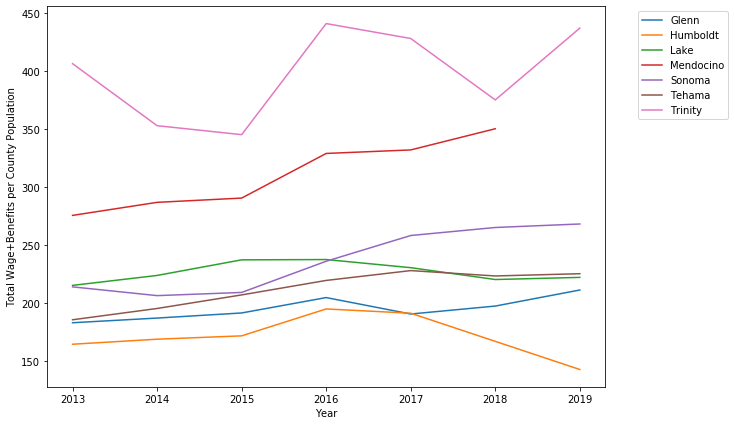

In [133]:
fig,ax = plt.subplots(figsize=(10,7))
tst = county_df.loc[(county_df['DepartmentOrSubdivision'].str.contains('Probat') | county_df['DepartmentOrSubdivision'].str.contains('Sheriff') | county_df['DepartmentOrSubdivision'].str.contains('Jail') | county_df['DepartmentOrSubdivision'].str.contains('Juven'))].groupby(['EmployerCounty','Year'])['TotalPayPlusBenefits'].sum().reset_index()   
for a in tst['EmployerCounty'].unique(): 
    sub = tst.loc[tst['EmployerCounty']==a]
    population = pops.loc[pops['county']==a,'population'].values[0]
    plt.plot(sub['Year'],sub['TotalPayPlusBenefits']/population,label=a)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Year')
plt.ylabel('Total Wage+Benefits per County Population')

In [107]:
tst = county_df.loc[(county_df['Year']==2018) & (county_df['TotalWages']>10000) & (county_df['DepartmentOrSubdivision'].str.contains('Probat') | county_df['DepartmentOrSubdivision'].str.contains('Sheriff') | county_df['DepartmentOrSubdivision'].str.contains('Jail') | county_df['DepartmentOrSubdivision'].str.contains('Juven'))].groupby(['EmployerCounty','Position'])['TotalWages'].agg(['mean','size']).reset_index()   
# for a in tst['Position'].unique(): 
#     sub = tst.loc[tst['Position']==a]
#     plt.plot(sub['EmployerCounty'],sub['TotalPayPlusBenefits'],label=a)
# plt.legend(loc='upper left')
tst.sort_values('mean',ascending=False).head(60)

,EmployerCounty,Position,mean,size
250,Sonoma,Sheriff-Coroner,218281.000000,1
175,Sonoma,Assistant Sheriff,196146.333333,3
177,Sonoma,Chief Probation Officer,194672.000000,1
252,Sonoma,Sheriffs Captain Corrections,182714.000000,2
251,Sonoma,Sheriffs Captain,177538.666667,3
256,Sonoma,Sheriffs Sergeant,170064.484848,33
143,Mendocino,Sheriff Coroner,164408.000000,1
254,Sonoma,Sheriffs Lieutenant,153074.000000,11
192,Sonoma,Correctional Lieutenant,151704.428571,7
200,Sonoma,Deputy Chief Probation Officer,149346.000000,2


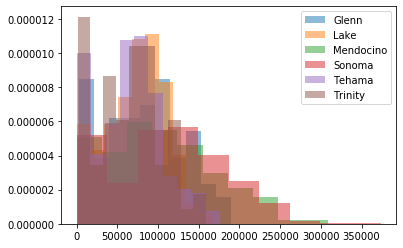

In [94]:
tst = county_df.loc[(county_df['Year']==2018) & (county_df['TotalWages']>0) & (county_df['DepartmentOrSubdivision'].str.contains('Probat') | county_df['DepartmentOrSubdivision'].str.contains('Sheriff') | county_df['DepartmentOrSubdivision'].str.contains('Jail') | county_df['DepartmentOrSubdivision'].str.contains('Juven'))]  
for a in tst['EmployerCounty'].unique(): 
    sub = tst.loc[tst['EmployerCounty']==a]
    plt.hist(sub['TotalPayPlusBenefits'],density=True,alpha=0.5,label=a)
plt.legend(loc='upper right')

In [95]:
tst.loc[(tst['TotalPayPlusBenefits']<1000)]

,Year,EmployerType,EmployerName,DepartmentOrSubdivision,Position,ElectedOfficial,Judicial,OtherPositions,MinPositionSalary,MaxPositionSalary,...,TotalRetirementAndHealthContribution,PensionFormula,EmployerURL,EmployerPopulation,LastUpdatedDate,EmployerCounty,SpecialDistrictActivities,IncludesUnfundedLiability,SpecialDistrictType,TotalPayPlusBenefits
52754,2018,County,Lake,Jail Facilities,Correctional Aide,False,False,NaN,32926.0,40019.0,...,0.0,2.0%@62,www.lakecountyca.gov,65071,06/25/2019,Lake,NaN,0.0,NaN,550.0
52763,2018,County,Lake,Jail Facilities,Correctional Officer I,False,False,NaN,39998.0,48610.0,...,0.0,2.0%@62,www.lakecountyca.gov,65071,06/25/2019,Lake,NaN,0.0,NaN,450.0
173913,2018,County,Mendocino,Juvenile Hall,Cook Extra Help,False,False,NaN,29266.0,35568.0,...,0.0,2% @ 57,https://www.mendocinocounty.org/government/hum...,89009,06/25/2019,Mendocino,NaN,1.0,NaN,615.0
173917,2018,County,Mendocino,Juvenile Hall,Juvenile Correction Officer Extra Help,False,False,NaN,37253.0,45282.0,...,0.0,NaN,https://www.mendocinocounty.org/government/hum...,89009,06/25/2019,Mendocino,NaN,1.0,NaN,926.0
173918,2018,County,Mendocino,Juvenile Hall,Juvenile Correction Officer Extra Help,False,False,NaN,37253.0,45282.0,...,0.0,NaN,https://www.mendocinocounty.org/government/hum...,89009,06/25/2019,Mendocino,NaN,1.0,NaN,184.0
173920,2018,County,Mendocino,Juvenile Hall,Juvenile Correction Officer Extra Help,False,False,NaN,37253.0,45282.0,...,0.0,2.5% @ 67,https://www.mendocinocounty.org/government/hum...,89009,06/25/2019,Mendocino,NaN,1.0,NaN,213.0
173921,2018,County,Mendocino,Juvenile Hall,Juvenile Correction Officer Extra Help,False,False,NaN,37253.0,45282.0,...,0.0,2.5% @ 67,https://www.mendocinocounty.org/government/hum...,89009,06/25/2019,Mendocino,NaN,1.0,NaN,300.0
351925,2018,County,Sonoma,Probation Department,Juvenile Correctional Counselor I Extra Help,False,False,NaN,NaN,NaN,...,21.0,NaN,http://sonomacounty.ca.gov/Human-Resources/,500675,06/25/2019,Sonoma,NaN,1.0,NaN,540.0
351987,2018,County,Sonoma,Probation Department,Juvenile Correctional Counselor II Extra Help,False,False,NaN,NaN,NaN,...,0.0,NaN,http://sonomacounty.ca.gov/Human-Resources/,500675,06/25/2019,Sonoma,NaN,1.0,NaN,749.0
351994,2018,County,Sonoma,Probation Department,Juvenile Correctional Counselor II Extra Help,False,False,NaN,NaN,NaN,...,0.0,NaN,http://sonomacounty.ca.gov/Human-Resources/,500675,06/25/2019,Sonoma,NaN,1.0,NaN,949.0
